In [25]:
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model



In [26]:
import tensorflow as tf

fully connected neural network

In [27]:
inputs = Input((1,))
X1 = Dense(32, activation='relu')(inputs)
X2 = Dense(64,activation = 'relu')(X1)
X =  Dense(128, activation = 'relu')(X2)
outputs = Dense(1)(X)

model = Model(inputs,outputs)
model.compile('adam', loss = 'mse', metrics= tf.keras.metrics.R2Score(name="accuracy"))
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                64        
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
import numpy as np
import matplotlib.pyplot as plt


In [29]:
x = np.random.randint(-20,21, size = 5000,dtype=int)
y = 5*(x**3)-8*(x**2) -7*x +1

print(x)
print(y)


[ -9   7 -19 ... -17  -1   7]
[ -4229   1275 -37049 ... -26757     -5   1275]


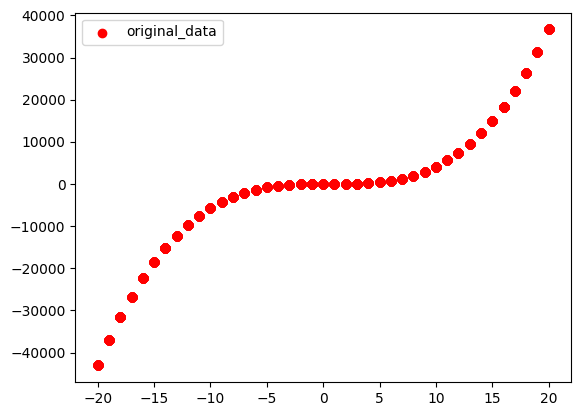

In [30]:
plt.scatter(x,y, color="red", label="original_data")
plt.legend()

In [31]:
xmn = np.min(x)
xmx = np.max(x)
ymn = np.min(y)
ymx = np.max(y)

x = 2*((x-xmn)/(xmx-xmn))-1
y = 2*((y-ymn)/(ymx-ymn))-1

In [32]:
size = (len(x))
xtrain = x[:int(size*0.9)]
ytrain = y[:int(size*0.9)]

xval = x[int(size*0.9):int(size*.95)]
yval = y[int(size*0.9):int(size*.95)]

xtest = x[int(size*.95): ]
ytest = y[int(size*.95):]


In [33]:
history = model.fit(xtrain, ytrain, epochs=20,validation_data = (xval, yval))
history

Epoch 1/20
141/141 [==============================] - 2s 5ms/step - loss: 0.0166 - accuracy: 0.8987 - val_loss: 0.0018 - val_accuracy: 0.9877
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 6.5376e-04 - accuracy: 0.9960 - val_loss: 1.8585e-04 - val_accuracy: 0.9987
Epoch 3/20
141/141 [==============================] - 1s 4ms/step - loss: 1.2265e-04 - accuracy: 0.9993 - val_loss: 1.1275e-04 - val_accuracy: 0.9992
Epoch 4/20
141/141 [==============================] - 1s 5ms/step - loss: 4.8115e-05 - accuracy: 0.9997 - val_loss: 2.7267e-05 - val_accuracy: 0.9998
Epoch 5/20
141/141 [==============================] - 1s 5ms/step - loss: 2.2441e-05 - accuracy: 0.9999 - val_loss: 1.2351e-05 - val_accuracy: 0.9999
Epoch 6/20
141/141 [==============================] - 1s 5ms/step - loss: 1.2037e-05 - accuracy: 0.9999 - val_loss: 7.1677e-06 - val_accuracy: 1.0000
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 8.4504e-06 - accuracy: 0.9999 - va

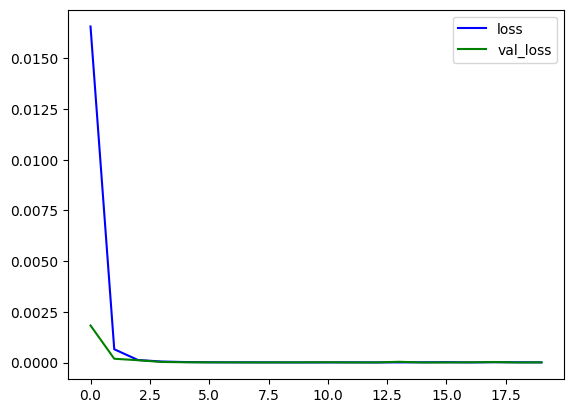

In [34]:
plt.plot(history.history['loss'], color="blue", label="loss")
plt.plot(history.history['val_loss'], color="green", label="val_loss")
plt.legend()

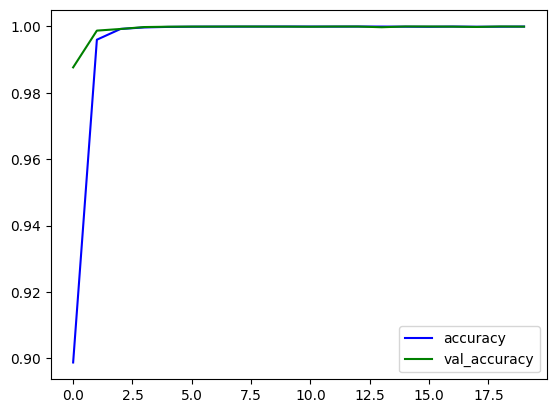

In [35]:
plt.plot(history.history['accuracy'], color="blue", label="accuracy")
plt.plot(history.history['val_accuracy'], color="green",label="val_accuracy")
plt.legend()

In [36]:
y_pred = model.predict(xtest)

8/8 [==============================] - 0s 2ms/step


In [37]:
x_true = (((xtest+1)*(xmx-xmn))/2) + xmn
y_true = (((ytest+1)*(ymx-ymn))/2) + ymn
y_pred_true = (((y_pred+1)*(ymx-ymn))/2) + ymn


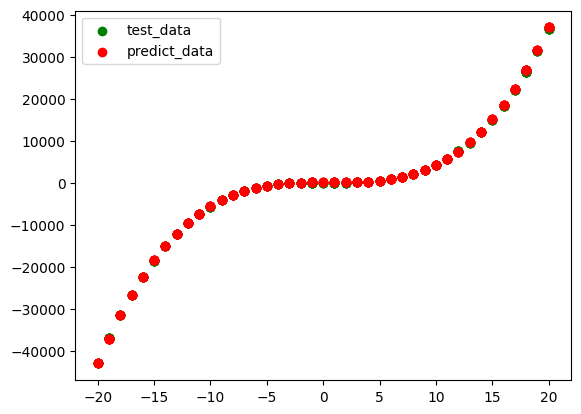

In [38]:
plt.scatter(x_true,y_true,color="green", marker='o', label = 'test_data')
plt.scatter(x_true,y_pred_true,color="red", marker='o', label = 'predict_data')
plt.legend()
plt.show()
# plt.plot(xtest,y_pred, color="blue")